# Attention Mechanism Comparison Visualization

This notebook visualizes and analyzes the results of our attention mechanism benchmarks.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from attention_mechanisms import DotProductAttention, MultiHeadAttention, SparseAttention
import torch

## Benchmark Results

First, let's input the results from our benchmark_attention.py script.

In [3]:
# Replace these with your actual benchmark results
results = {
    "Dot Product Attention": 0.001,
    "Multi-Head Attention": 0.002,
    "Sparse Attention": 0.0015
}

df = pd.DataFrame(list(results.items()), columns=['Mechanism', 'Time'])
df['Speedup'] = df['Time'].max() / df['Time']
df

,Mechanism,Time,Speedup
0,Dot Product Attention,0.0010,2.000000
1,Multi-Head Attention,0.0020,1.000000
2,Sparse Attention,0.0015,1.333333


## Visualizing Benchmark Results

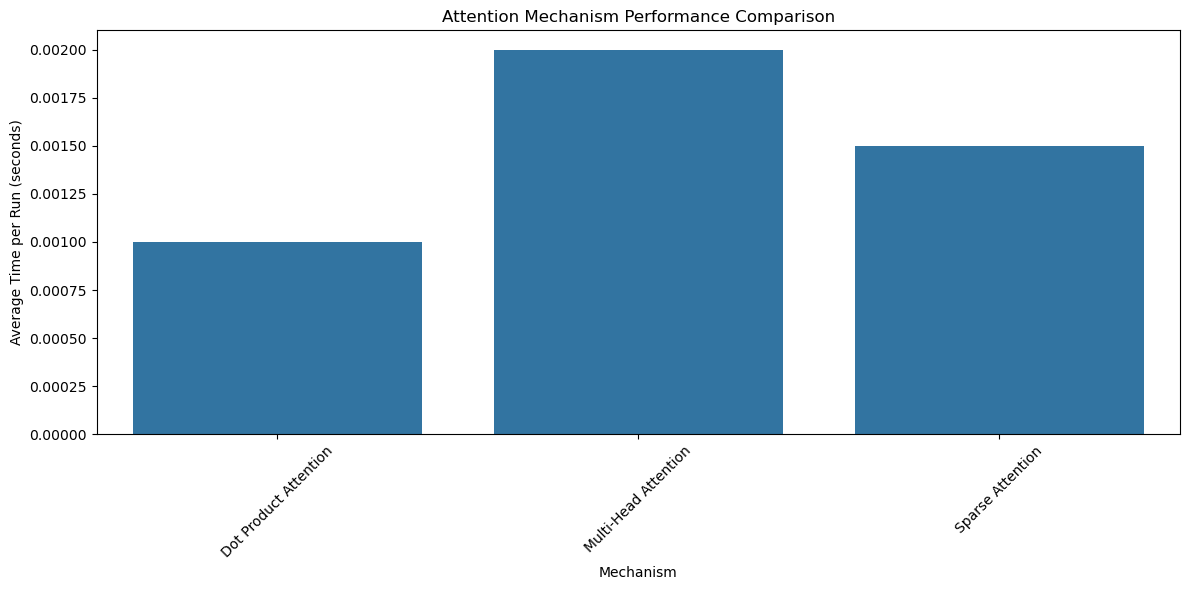

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Mechanism', y='Time', data=df)
plt.title('Attention Mechanism Performance Comparison')
plt.ylabel('Average Time per Run (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Speedup Comparison

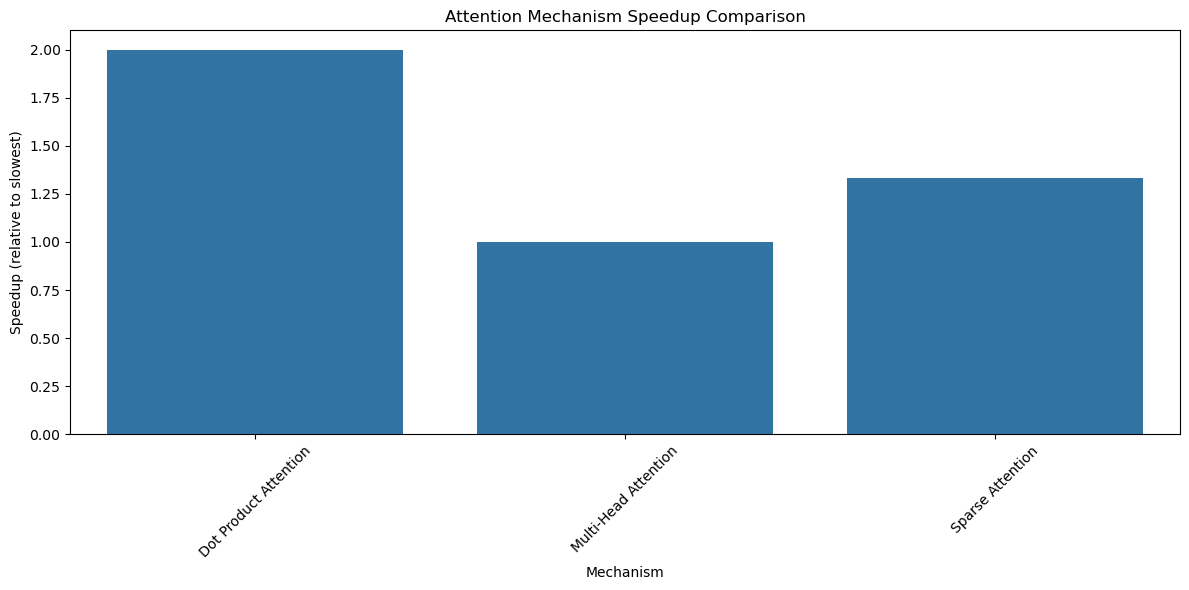

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Mechanism', y='Speedup', data=df)
plt.title('Attention Mechanism Speedup Comparison')
plt.ylabel('Speedup (relative to slowest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Attention Pattern Visualization

Now, let's visualize the attention patterns for each mechanism.

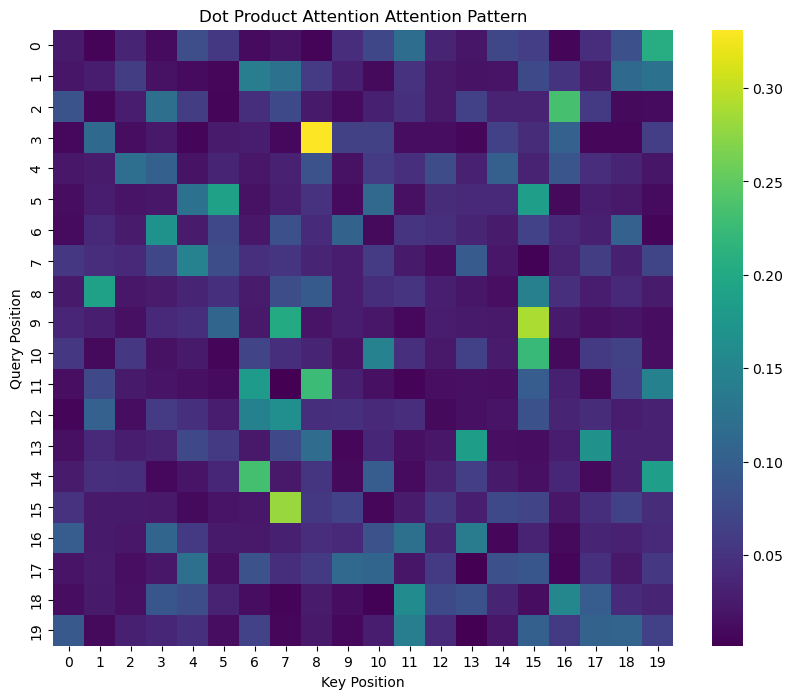

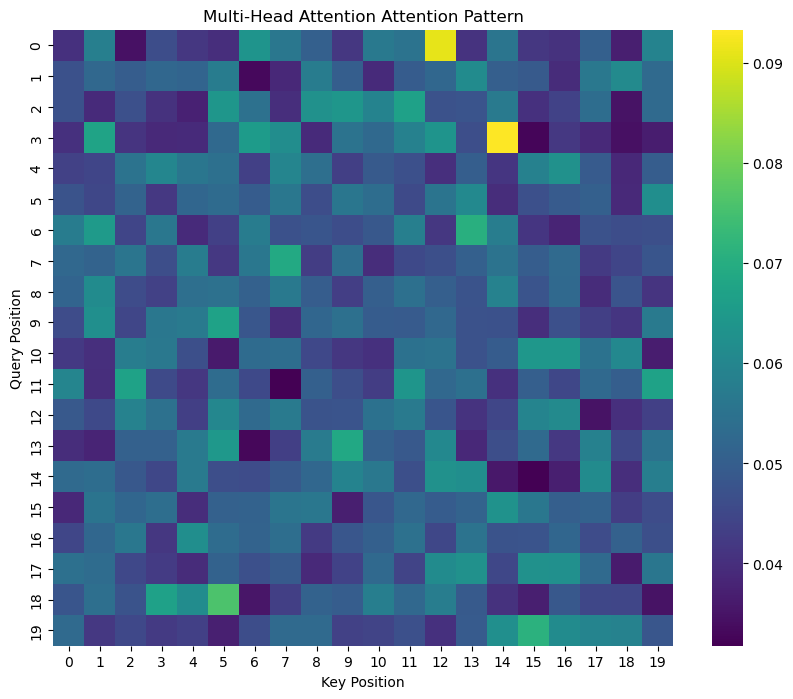

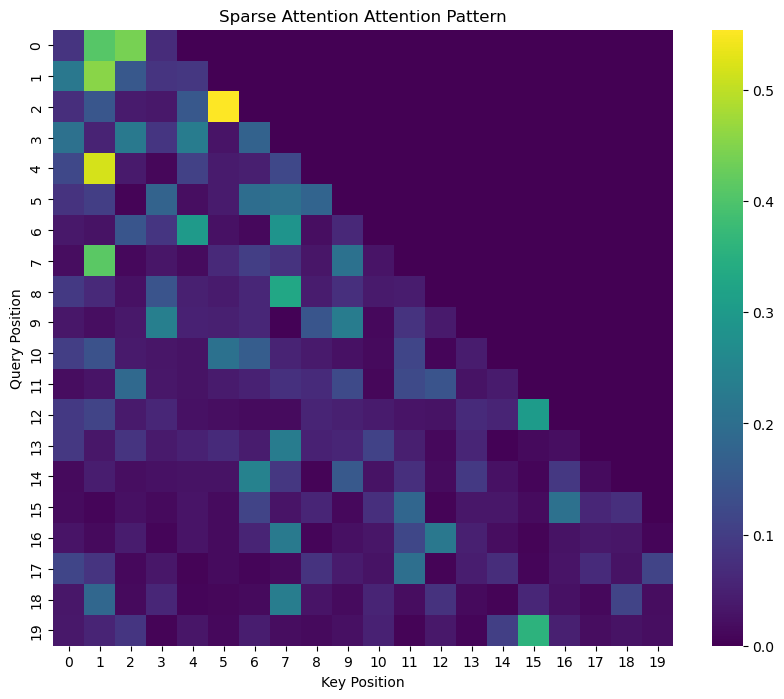

In [6]:
def visualize_attention(mechanism, name):
    seq_len = 20
    embed_dim = 64
    
    query = torch.randn(1, seq_len, embed_dim)
    key = torch.randn(1, seq_len, embed_dim)
    value = torch.randn(1, seq_len, embed_dim)
    
    with torch.no_grad():
        _, attention = mechanism(query, key, value)
    
    if attention.dim() == 4:  # Multi-head attention
        attention = attention.mean(dim=1)  # Average over heads
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention.squeeze().numpy(), cmap='viridis')
    plt.title(f'{name} Attention Pattern')
    plt.xlabel('Key Position')
    plt.ylabel('Query Position')
    plt.show()

# Visualize each attention mechanism
visualize_attention(DotProductAttention(64), "Dot Product Attention")
visualize_attention(MultiHeadAttention(64, 4), "Multi-Head Attention")
visualize_attention(SparseAttention(64, 4), "Sparse Attention")

## Analysis

Based on the benchmark results and attention pattern visualizations, we can make the following observations:

1. Performance: [Discuss which mechanism was fastest and potential reasons why]

2. Speedup: [Analyze the relative speedup of each mechanism]

3. Attention Patterns:
   - Dot Product Attention: [Describe the observed pattern]
   - Multi-Head Attention: [Describe the observed pattern]
   - Sparse Attention: [Describe the observed pattern]

4. Trade-offs: [Discuss the trade-offs between performance and attention quality for each mechanism]

5. Potential Improvements: [Suggest ways to potentially improve each mechanism]